# Resturnat Customer Reviews Analysis

Objective: To analyze customer reviews from Sample Zamato Resturant databse to identify key trends

# Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

##  First An SQL Connection To The SQLite Database Has To Be Made

In [3]:
con = sqlite3.connect('zomato_rawdata.sqlite')

In [4]:
pd.read_sql_query('SELECT * from Users', con).head(2)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table   rate  votes                           phone  \
0          Yes        Yes  4.1/5    775  080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [5]:
df = pd.read_sql_query('SELECT * from Users', con)

In [6]:
df.shape

(51717, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [8]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
# Percentage Of Missing Values In Each Feature
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df.replace(['NEW', '-'], np.NaN, inplace=True)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
df['rate'] = df['rate'].apply(lambda x: float( x.split('/')[0]) if type(x) == str else x)

In [15]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
plt.figure(figsize=(20,10))
df.groupby('rate')['online_order'].value_counts()

rate  online_order
1.8   No                 5
2.0   No                11
2.1   Yes               15
      No                 9
2.2   Yes               16
      No                10
2.3   No                29
      Yes               22
2.4   No                36
      Yes               34
2.5   Yes               63
      No                38
2.6   Yes              177
      No                83
2.7   Yes              166
      No               141
2.8   Yes              376
      No               224
2.9   Yes              488
      No               314
3.0   Yes              584
      No               439
3.1   Yes              974
      No               587
3.2   Yes             1044
      No               829
3.3   Yes             1173
      No              1137
3.4   Yes             1452
      No              1024
3.5   Yes             1694
      No              1090
3.6   Yes             2226
      No              1090
3.7   Yes             2649
      No              1172
3.8   Yes

<Figure size 2000x1000 with 0 Axes>

In [18]:
x = pd.crosstab(index = df['rate'] , columns =df['online_order'])

In [19]:
x

online_order    No   Yes
rate                    
1.8              5     0
2.0             11     0
2.1              9    15
2.2             10    16
2.3             29    22
2.4             36    34
2.5             38    63
2.6             83   177
2.7            141   166
2.8            224   376
2.9            314   488
3.0            439   584
3.1            587   974
3.2            829  1044
3.3           1137  1173
3.4           1024  1452
3.5           1090  1694
3.6           1090  2226
3.7           1172  2649
3.8           1147  2726
3.9           1017  2955
4.0            874  2309
4.1            843  2105
4.2            648  1536
4.3            692  1001
4.4            374   773
4.5            297   359
4.6            140   160
4.7            113    54
4.8             34    32
4.9             12    43

<Axes: xlabel='rate'>

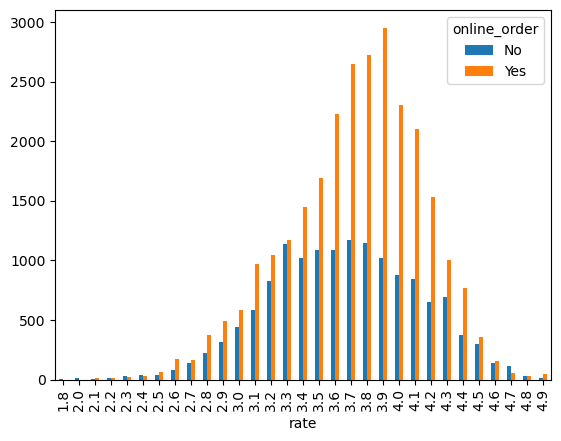

In [20]:
x.plot(kind='bar')

In [21]:
## axis = 1 means summation across rows... , as by-default it is axis is 0
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [22]:
## we need Floating division of dataframe or normalized values of x dataframe across rows..just call x.div() & set axis=0
## div is a in-built function of pandas designed for dataframe data-structure..

normalize_df = x.div(x.sum(axis=1).astype(float) , axis=0)

In [23]:
normalize_df

online_order        No       Yes
rate                            
1.8           1.000000  0.000000
2.0           1.000000  0.000000
2.1           0.375000  0.625000
2.2           0.384615  0.615385
2.3           0.568627  0.431373
2.4           0.514286  0.485714
2.5           0.376238  0.623762
2.6           0.319231  0.680769
2.7           0.459283  0.540717
2.8           0.373333  0.626667
2.9           0.391521  0.608479
3.0           0.429130  0.570870
3.1           0.376041  0.623959
3.2           0.442605  0.557395
3.3           0.492208  0.507792
3.4           0.413570  0.586430
3.5           0.391523  0.608477
3.6           0.328709  0.671291
3.7           0.306726  0.693274
3.8           0.296153  0.703847
3.9           0.256042  0.743958
4.0           0.274584  0.725416
4.1           0.285957  0.714043
4.2           0.296703  0.703297
4.3           0.408742  0.591258
4.4           0.326068  0.673932
4.5           0.452744  0.547256
4.6           0.466667  0.533333
4.7           0.676647  0.323353
4.8           0.515152  0.484848
4.9           0.218182  0.781818

<Axes: xlabel='rate'>

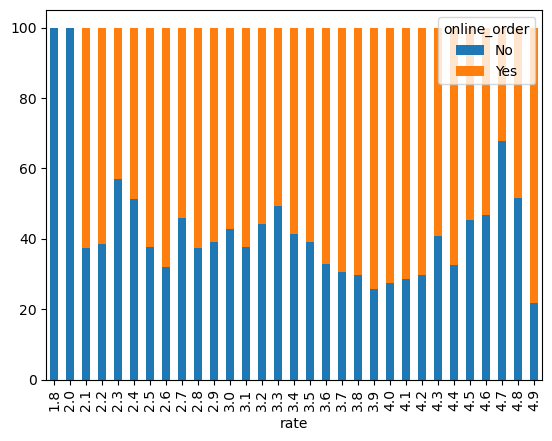

In [24]:
## lets multiply each value by 100 so that we will get much better results in % !
## stacked=True gives basically stacked bar chart

(normalize_df*100).plot(kind='bar' , stacked=True)

In [25]:
'''
Inference :: 

For good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings
than those rest. who don't accept online order 

'''

"\nInference :: \n\nFor good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings\nthan those rest. who don't accept online order \n\n"

In [26]:
data = df.dropna(subset=['rest_type'])

In [27]:
len(data['rest_type'].unique())

93

In [28]:
data['rest_type'].isnull().sum()

0

In [29]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [38]:
# Performing Analysis Of Revviews Of Only 'Quick Bites' Resturant Type

In [30]:
### extracting data of 'Quick Bites' only ..
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [31]:
quick_bites_df.shape

(20639, 18)

In [32]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())

C:\Users\IFECHUKWUDE\AppData\Local\Temp\ipykernel_19768\990775181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())


In [33]:
quick_bites_df['reviews_list']

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [34]:
#### b) Do tokenization
from nltk.corpus import RegexpTokenizer

In [35]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [36]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [37]:
## tokenize data of third review
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [40]:
reviews_tokens = quick_bites_df['reviews_list'].apply(tokenizer.tokenize)

## 5.. Performing Unigram analysis & removal of stopwords ..

In [41]:
reviews_tokens

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [42]:
from nltk.corpus import stopwords

In [43]:
# These are common words defined by Python developers that typically don't add meaning to the text and can be removed
stop = stopwords.words('english')

In [44]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
# Adding custom words to stopwords 
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [46]:
reviews_tokens.reset_index(drop=True, inplace=True)

In [47]:
reviews_tokens

0        [rated, rated, n, great, food, and, proper, ka...
1        [rated, rated, n, so, went, here, with, friend...
2        [rated, rated, n, please, provide, some, extra...
3        [rated, rated, n, worst, restaurant, ever, veg...
4        [rated, rated, n, not, worth, for, the, money,...
                               ...                        
20634    [rated, rated, n, food, is, not, upto, the, ma...
20635                                                   []
20636                                                   []
20637                                                   []
20638    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [48]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [49]:
reviews_tokens_clean

0        [great, food, proper, karnataka, style, full, ...
1        [went, friends, tea, ambience, striking, say, ...
2        [please, provide, extra, sambal, quantity, les...
3        [worst, restaurant, ever, veg, manchurian, wor...
4        [worth, money, pay, ambience, good, enough, se...
                               ...                        
20634    [food, upto, mark, nquantity, food, little, nc...
20635                                                   []
20636                                                   []
20637                                                   []
20638    [randomly, looking, zomato, burger, show, rest...
Name: reviews_list, Length: 20639, dtype: object

In [50]:
### now this reviews_tokens_clean is a series ,but we need entire data in the form of 1-D list so that we can compute frequency of
### each word

In [51]:
total_reviews_2D = list(reviews_tokens_clean)

In [52]:
total_reviews_2D

[['great',
  'food',
  'proper',
  'karnataka',
  'style',
  'full',
  'meals',
  'twice',
  'fully',
  'satisfied',
  'give',
  'stars',
  'well',
  'managed',
  'reached',
  'place',
  'pm',
  'saturday',
  'half',
  'items',
  'menu',
  'annoying',
  'food',
  'cold',
  'taste',
  'also',
  'average',
  'dosa',
  'holige',
  'good',
  'people',
  'restaurant',
  'service',
  'still',
  'slow',
  'waiters',
  'standing',
  'one',
  'corner',
  'talking',
  'call',
  'repeatedly',
  'good',
  'food',
  'served',
  'tasty',
  'good',
  'place',
  'go',
  'freinds',
  'family',
  'first',
  'get',
  'served',
  'well',
  'food',
  'one',
  'good',
  'hotel',
  'price',
  'udupi',
  'restaurant',
  'dirty',
  'floor',
  'walls',
  'waiters',
  'stained',
  'food',
  'cant',
  'clean',
  'floor',
  'even',
  'decorative',
  'colour',
  'paper',
  'every',
  'lot',
  'food',
  'coming',
  'taste',
  'food',
  'pretty',
  'decent',
  'chargw',
  'upset',
  'us',
  'menu',
  'says',
  'serve

In [53]:
total_reviews_1D = []
for reviews in total_reviews_2D:
    for word in reviews:
        total_reviews_1D.append(word)

In [54]:
len(total_reviews_1D)

6623270

## e) Do plotting
    1..Unigram analysis
    2..Bigram Analysis
    3..Trigram analysis

In [56]:
# obtain the frequency of individual words in the reviews, for this we'll use FreqDist .. 

In [57]:
from nltk import FreqDist

In [58]:
fd = FreqDist()

In [59]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [60]:
# Examining the top 20 most frequent words
fd.most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

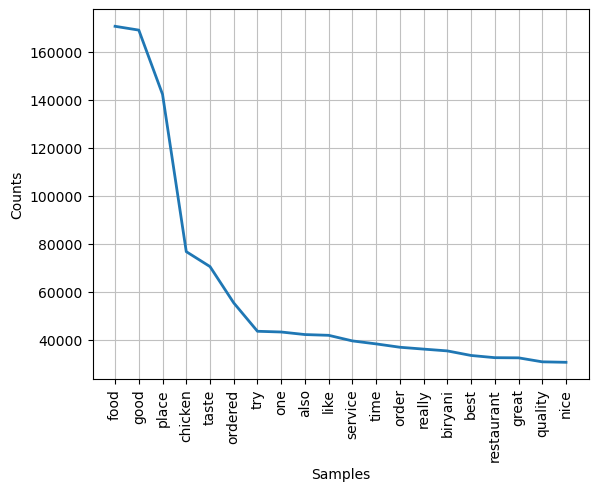

<Axes: xlabel='Samples', ylabel='Counts'>

In [61]:
fd.plot(20)

In [62]:
## Observations
## Of the 20 most frequent words across customer reviews place, food , good , chicken ,taste ,service ,biryani

## but it is not that much clear whether food is good or not , 
## similarly what about chicken ??
## so to come up with meaningful insights , we can think of using Bi-gram analysis..

In [63]:
from nltk import FreqDist , bigrams , trigrams

In [64]:
# Generating bigrams from the reviews
bi_grams = bigrams(total_reviews_1D)

In [65]:
# Getting the bigram frequency distribution

fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [66]:
fd_bigrams.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256)]

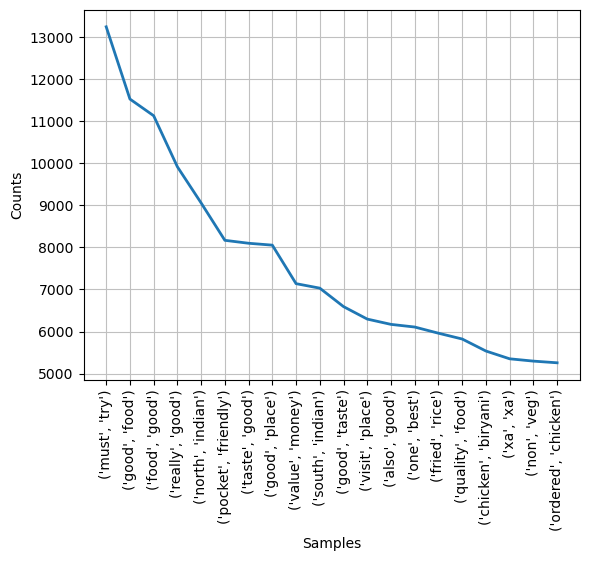

<Axes: xlabel='Samples', ylabel='Counts'>

In [67]:
fd_bigrams.plot(20)

  Observations
    We have some new insights! Food items/preferences mentioned in the top 50 bigrams are 
    
    Fried Rice , Ice cream , non-veg , chicken biryani , main course
    Fried Rice
 

    Factors contributing to restaurant experience are : 
    good food > pocket friendly > good place > good place > value (for) money  > Home delivery..

    There's a key insight here: the expense factor, which was missed by individual word frequency counts, 
    was picked up by the bigram frequency counts.

In [68]:
### but there is no conclusion about north Indian or south Indian bcz it can be dish or it can be regional people as well..
### so lets perform trigram anlysis to come up with some more meaningful insights..

In [69]:
tri_grams = trigrams(total_reviews_1D)

In [70]:
tri_grams

<generator object trigrams at 0x0000024C2692EB20>

In [71]:
# Getting the bigram frequency distribution

fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [72]:
fd_trigrams.most_common(20)

[(('xa', 'xa', 'xa'), 5059),
 (('north', 'indian', 'food'), 3079),
 (('f', 'f', 'f'), 2581),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('f', 'c', 'f'), 1042),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787)]

## Observations
    There appears to be some bad data (strings of "f f f") somewhere in the reviews, but we'll ignore that.

    The specific food preferences we can see here are north Indian Food , paneer butter masala,
    South Indian food & chicken fried rice...
    ie , Bangalore is full of chicken lovers...

## Cusines Features

In [73]:
data['cuisines'].isnull().sum()

24

## Quick Bites Cuisines

In [74]:
cuisines = quick_bites_df.dropna(subset=['cuisines'])

In [75]:
datas = cuisines['cuisines']

In [76]:
datas.reset_index(drop=True, inplace =True)

In [77]:
cuisines_tokens = datas.apply(tokenizer.tokenize)

In [78]:
cuisines_tokens

0                      [South, Indian, North, Indian]
1               [Italian, Fast, Food, Cafe, European]
2                               [Cafe, South, Indian]
3        [North, Indian, Fast, Food, Chinese, Burger]
4                [North, Indian, Biryani, Fast, Food]
                             ...                     
20629                [Andhra, Chinese, South, Indian]
20630                                 [South, Indian]
20631                                [Biryani, Kebab]
20632                                 [North, Indian]
20633                            [Fast, Food, Burger]
Name: cuisines, Length: 20634, dtype: object

In [79]:
total_cuisines_2D = list(cuisines_tokens)

In [80]:
total_cuisines_1D = []

for cuisine in total_cuisines_2D:
    for word in cuisine:
        total_cuisines_1D.append(word)

In [81]:
fd2 = FreqDist()

In [82]:
for word in total_cuisines_1D:
    fd2[word] = fd2[word] + 1

In [83]:
fd2.most_common(20)

[('Indian', 13859),
 ('North', 8566),
 ('Food', 7430),
 ('Chinese', 6433),
 ('Fast', 5364),
 ('South', 5294),
 ('Biryani', 3280),
 ('Street', 1804),
 ('Beverages', 1584),
 ('Rolls', 1060),
 ('Kerala', 812),
 ('Burger', 794),
 ('Desserts', 725),
 ('Kebab', 602),
 ('Momos', 586),
 ('Pizza', 557),
 ('Juices', 519),
 ('Arabian', 517),
 ('Italian', 478),
 ('Mithai', 469)]

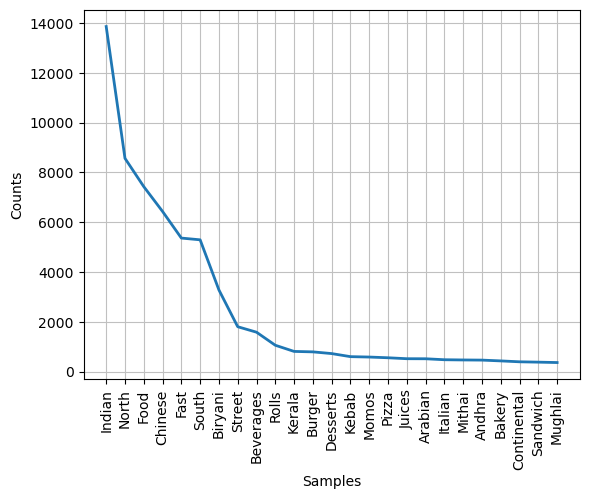

<Axes: xlabel='Samples', ylabel='Counts'>

In [84]:
fd2.plot(25)

In [85]:
bi_grams2 = bigrams(total_cuisines_1D)

In [86]:
fd2_bigrams = FreqDist()
for bigram in bi_grams2:
    fd2_bigrams[bigram] = fd2_bigrams[bigram] + 1

In [87]:
fd2_bigrams.most_common(20)

[(('North', 'Indian'), 8555),
 (('Fast', 'Food'), 5364),
 (('South', 'Indian'), 5294),
 (('Indian', 'Chinese'), 4169),
 (('Indian', 'North'), 2596),
 (('Street', 'Food'), 1804),
 (('Chinese', 'North'), 1740),
 (('Indian', 'South'), 1635),
 (('Food', 'North'), 1307),
 (('Indian', 'Biryani'), 1154),
 (('Indian', 'Fast'), 1145),
 (('Chinese', 'South'), 845),
 (('Food', 'South'), 761),
 (('Chinese', 'Fast'), 736),
 (('Biryani', 'North'), 728),
 (('Chinese', 'Biryani'), 605),
 (('Food', 'Beverages'), 597),
 (('Food', 'Fast'), 594),
 (('Indian', 'Street'), 554),
 (('Biryani', 'South'), 520)]

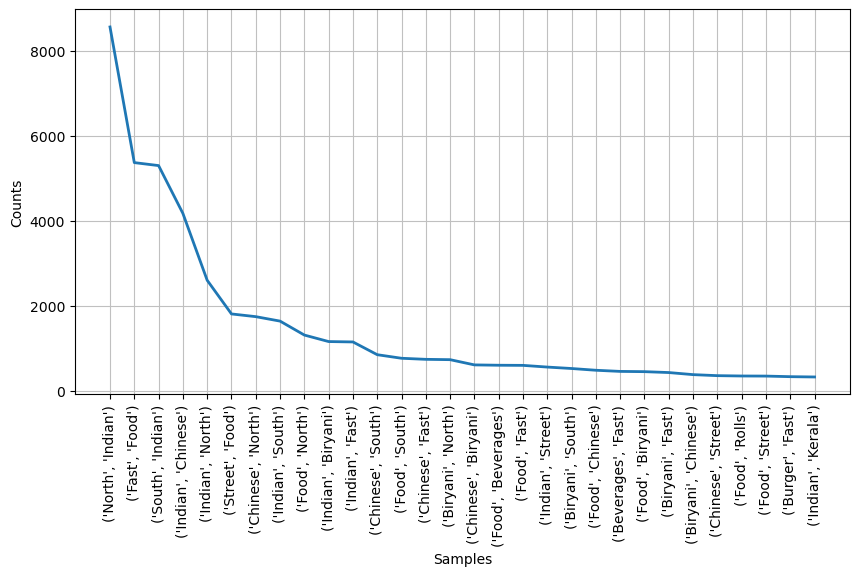

<Axes: xlabel='Samples', ylabel='Counts'>

In [88]:
plt.figure(figsize=(10,5))
fd2_bigrams.plot(30)

In [89]:
tri_grams3 = trigrams(total_cuisines_1D)

In [90]:
fd_trigrams3 = FreqDist()

for trigram in tri_grams3:
    fd_trigrams3[trigram] = fd_trigrams3[trigram] + 1

In [91]:
fd_trigrams3.most_common(50)

[(('North', 'Indian', 'Chinese'), 3290),
 (('Indian', 'North', 'Indian'), 2594),
 (('South', 'Indian', 'North'), 1749),
 (('Chinese', 'North', 'Indian'), 1737),
 (('Indian', 'South', 'Indian'), 1635),
 (('Food', 'North', 'Indian'), 1306),
 (('North', 'Indian', 'South'), 1148),
 (('Indian', 'Fast', 'Food'), 1145),
 (('Indian', 'Chinese', 'North'), 929),
 (('Fast', 'Food', 'North'), 914),
 (('South', 'Indian', 'Chinese'), 879),
 (('North', 'Indian', 'North'), 846),
 (('Chinese', 'South', 'Indian'), 845),
 (('Food', 'South', 'Indian'), 761),
 (('Chinese', 'Fast', 'Food'), 736),
 (('Biryani', 'North', 'Indian'), 726),
 (('North', 'Indian', 'Fast'), 716),
 (('Indian', 'Chinese', 'South'), 632),
 (('North', 'Indian', 'Biryani'), 605),
 (('Food', 'Fast', 'Food'), 594),
 (('Indian', 'Street', 'Food'), 554),
 (('South', 'Indian', 'Biryani'), 545),
 (('Fast', 'Food', 'South'), 535),
 (('Biryani', 'South', 'Indian'), 520),
 (('Indian', 'Chinese', 'Biryani'), 506),
 (('South', 'Indian', 'South'), 

ModuleNotFoundError: No module named 'geopy'